#  Chargement et preparation  de la données 

In [1]:
import pandas as pd
import sklearn.preprocessing as preprocessing
df = pd.read_csv("Data_for_prediction.csv",low_memory=False)
X = df
def encode(X,X_test,categorical_columns):
    le = preprocessing.LabelEncoder()
    XX = X
    for i in categorical_columns : 
        le = preprocessing.LabelEncoder()
        le.fit(XX[i].astype(str))
        print(list(le.classes_))
        X[i] = le.transform(X[i].astype(str))

encode(X,X,["genre"])

XX = pd.DataFrame()
for i in range(0,15) : 
    X_curr = X[X["genre"] == i][0:4000]
    XX = pd.concat([XX , X_curr] , ignore_index=True)
    
y = XX['genre']
XX = XX.drop(["genre"] , axis= 1 )
XX.head()
XX = XX.drop(["key"] , axis= 1 )
XX = XX.drop(["mode"] , axis= 1 )



['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse', 'techno', 'trance', 'trap']


**Equilibrage des Données**





In [2]:
from sklearn import preprocessing
import imblearn
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(XX, y)

X_sm.shape


(60000, 25)

In [3]:
X_sm.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,0.831,0.814,-7.364,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,...,0.913853,0.915898,0.905553,0.585015,0.679300,0.589886,0.626308,0.568642,0.562136,0.660077
1,0.719,0.493,-7.230,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,...,0.117545,0.240131,0.076856,-0.036545,0.019016,-0.033106,0.096250,0.135577,-0.069401,0.220091
2,0.850,0.893,-4.783,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,...,-0.263811,-0.168824,-0.338808,-0.188215,-0.150082,-0.257177,-0.194407,0.111461,-0.232145,-0.057473
3,0.476,0.781,-4.710,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,...,0.770616,0.738761,0.793181,0.866356,0.649997,0.865518,0.860183,0.633164,0.775838,0.503591
4,0.798,0.624,-7.668,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,...,0.848353,0.818072,0.776984,0.559438,0.578821,0.499398,0.595705,0.748138,0.414689,0.667744


***Sepration des données en ensemble de Test et de Train***

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)


**Entrainement du Model**

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

standardScalar = StandardScaler()
svm = svm.SVC()
pipe = Pipeline(steps=[('standardScalar', standardScalar), ('svm', svm)])


param_grid = { 'svm__C':np.arange(1,70,2),'svm__kernel':('sigmoid','rbf')  }

In [22]:
grid= GridSearchCV(pipe, param_grid, cv=5, return_train_score =True)

In [23]:
grid.fit(X_sm, y_sm)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScalar', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69]),
                         'svm__kernel': ('sigmoid', 'rbf')},
             return_train_score=True)

In [24]:
model = grid.best_estimator_

In [30]:
df= pd.DataFrame(grid.cv_results_)
df.head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.793099,0.662085,23.892073,0.470983,1,sigmoid,"{'svm__C': 1, 'svm__kernel': 'sigmoid'}",0.543250,0.521500,0.532250,...,0.543300,0.020996,40,0.551646,0.560771,0.552375,0.527021,0.548146,0.547992,0.011275
1,31.565263,1.122340,22.039760,0.397786,1,rbf,"{'svm__C': 1, 'svm__kernel': 'rbf'}",0.742333,0.704333,0.724833,...,0.748617,0.032650,35,0.776438,0.785458,0.781021,0.766167,0.765687,0.774954,0.007905
2,37.235166,0.794535,23.526655,0.314680,3,sigmoid,"{'svm__C': 3, 'svm__kernel': 'sigmoid'}",0.531250,0.513583,0.517333,...,0.534867,0.022006,53,0.543417,0.554271,0.535250,0.526604,0.541188,0.540146,0.009150
3,29.810353,1.423860,21.075617,0.784294,3,rbf,"{'svm__C': 3, 'svm__kernel': 'rbf'}",0.751250,0.713167,0.737667,...,0.759083,0.033029,34,0.799479,0.806625,0.801333,0.787667,0.786625,0.796346,0.007876
4,34.134059,0.889010,22.273520,0.086828,5,sigmoid,"{'svm__C': 5, 'svm__kernel': 'sigmoid'}",0.540500,0.517500,0.529000,...,0.544617,0.021290,38,0.552979,0.557083,0.549562,0.543813,0.542271,0.549142,0.005542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,48.486378,2.775236,19.310804,0.485679,65,rbf,"{'svm__C': 65, 'svm__kernel': 'rbf'}",0.760000,0.725333,0.759000,...,0.778700,0.039505,3,0.873729,0.880938,0.871000,0.858083,0.858292,0.868408,0.008955
66,33.940279,0.840035,22.213292,0.120325,67,sigmoid,"{'svm__C': 67, 'svm__kernel': 'sigmoid'}",0.515333,0.511000,0.523750,...,0.531417,0.022463,63,0.521479,0.551937,0.542312,0.527479,0.537583,0.536158,0.010767
67,51.464964,5.472366,19.989073,0.920482,67,rbf,"{'svm__C': 67, 'svm__kernel': 'rbf'}",0.759833,0.725667,0.759000,...,0.778833,0.039544,1,0.874437,0.882167,0.871750,0.858812,0.859021,0.869237,0.009095
68,36.378192,0.819328,23.030775,0.185149,69,sigmoid,"{'svm__C': 69, 'svm__kernel': 'sigmoid'}",0.514500,0.513833,0.523333,...,0.531550,0.021875,61,0.521312,0.554792,0.541854,0.527563,0.536604,0.536425,0.011608


In [31]:
import matplotlib.pyplot as plt
df.shape

(70, 22)

**Recherche du meilleur score**

In [79]:
df3= df.sort_values(by = 'rank_test_score')
df3.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
67,51.464964,5.472366,19.989073,0.920482,67,rbf,"{'svm__C': 67, 'svm__kernel': 'rbf'}",0.759833,0.725667,0.759000,...,0.778833,0.039544,1,0.874437,0.882167,0.871750,0.858812,0.859021,0.869237,0.009095
69,54.709683,3.329716,19.998828,0.440891,69,rbf,"{'svm__C': 69, 'svm__kernel': 'rbf'}",0.759667,0.725500,0.759583,...,0.778783,0.039431,2,0.875313,0.882938,0.872625,0.859750,0.859417,0.870008,0.009160
65,48.486378,2.775236,19.310804,0.485679,65,rbf,"{'svm__C': 65, 'svm__kernel': 'rbf'}",0.760000,0.725333,0.759000,...,0.778700,0.039505,3,0.873729,0.880938,0.871000,0.858083,0.858292,0.868408,0.008955
63,51.498934,2.452401,20.366295,0.723530,63,rbf,"{'svm__C': 63, 'svm__kernel': 'rbf'}",0.760083,0.725333,0.758500,...,0.778450,0.039353,4,0.872521,0.880125,0.870292,0.857479,0.857333,0.867550,0.008901
61,51.958957,3.297999,20.278295,0.375939,61,rbf,"{'svm__C': 61, 'svm__kernel': 'rbf'}",0.759917,0.725333,0.758000,...,0.778200,0.039281,5,0.871479,0.879104,0.869646,0.856417,0.856500,0.866629,0.008890
59,50.508874,4.199723,20.829200,0.366226,59,rbf,"{'svm__C': 59, 'svm__kernel': 'rbf'}",0.760750,0.724917,0.757750,...,0.778100,0.039197,6,0.870792,0.878167,0.868792,0.855375,0.855437,0.865713,0.008976
57,49.842784,2.771058,19.912409,0.355071,57,rbf,"{'svm__C': 57, 'svm__kernel': 'rbf'}",0.760750,0.725250,0.756750,...,0.777883,0.039109,7,0.870188,0.877146,0.867854,0.854458,0.854583,0.864846,0.008968
55,48.857287,3.268483,20.071451,0.647303,55,rbf,"{'svm__C': 55, 'svm__kernel': 'rbf'}",0.761167,0.725167,0.756417,...,0.777867,0.039119,8,0.869313,0.876208,0.867104,0.853563,0.853271,0.863892,0.009065
53,46.718583,3.418018,19.889302,0.874101,53,rbf,"{'svm__C': 53, 'svm__kernel': 'rbf'}",0.760750,0.725667,0.756583,...,0.777817,0.038883,9,0.868333,0.875292,0.865979,0.852437,0.852000,0.862808,0.009174
51,48.416799,3.940858,20.000615,0.620639,51,rbf,"{'svm__C': 51, 'svm__kernel': 'rbf'}",0.760583,0.725750,0.756583,...,0.777567,0.038602,10,0.867208,0.874083,0.865167,0.851125,0.851021,0.861721,0.009182


In [84]:
df= pd.DataFrame(grid.cv_results_)
df1= df.loc[df['param_svm__kernel'] == 'rbf']
df3= df.loc[df['param_svm__kernel'] == 'sigmoid']
df3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,38.793099,0.662085,23.892073,0.470983,1,sigmoid,"{'svm__C': 1, 'svm__kernel': 'sigmoid'}",0.543250,0.521500,0.532250,...,0.543300,0.020996,40,0.551646,0.560771,0.552375,0.527021,0.548146,0.547992,0.011275
2,37.235166,0.794535,23.526655,0.314680,3,sigmoid,"{'svm__C': 3, 'svm__kernel': 'sigmoid'}",0.531250,0.513583,0.517333,...,0.534867,0.022006,53,0.543417,0.554271,0.535250,0.526604,0.541188,0.540146,0.009150
4,34.134059,0.889010,22.273520,0.086828,5,sigmoid,"{'svm__C': 5, 'svm__kernel': 'sigmoid'}",0.540500,0.517500,0.529000,...,0.544617,0.021290,38,0.552979,0.557083,0.549562,0.543813,0.542271,0.549142,0.005542
6,34.142097,0.767551,22.317328,0.100119,7,sigmoid,"{'svm__C': 7, 'svm__kernel': 'sigmoid'}",0.539750,0.518667,0.525167,...,0.544917,0.022624,37,0.552271,0.558000,0.545604,0.545250,0.542792,0.548783,0.005579
8,33.919485,1.041789,22.252071,0.126074,9,sigmoid,"{'svm__C': 9, 'svm__kernel': 'sigmoid'}",0.541667,0.517250,0.534833,...,0.545950,0.020679,36,0.551375,0.556792,0.556813,0.542500,0.542250,0.549946,0.006492


In [72]:
df1.shape

(35, 22)

<AxesSubplot:xlabel='param_svm__C'>

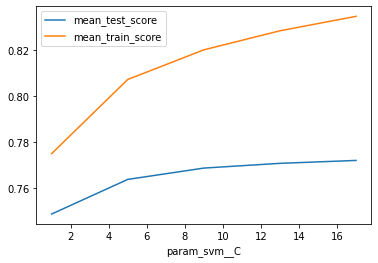

In [85]:
df2=df1[0:10:2]
df2.plot('param_svm__C',['mean_test_score','mean_train_score'],kind = 'line')


<AxesSubplot:xlabel='param_svm__C'>

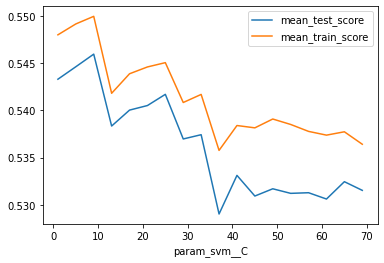

In [88]:
df4=df3[0:35:2]
df4.plot('param_svm__C',['mean_test_score','mean_train_score'],kind = 'line')

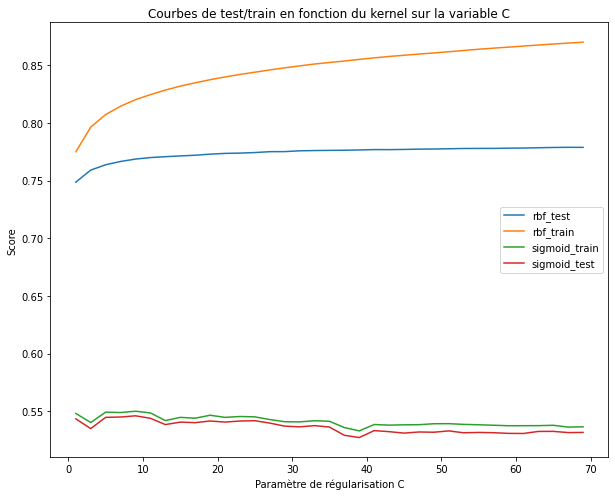

In [109]:
plt.figure(figsize=(10,8))
plt.plot(df1['param_svm__C'],df1['mean_test_score'],label='rbf_test')
plt.plot(df1['param_svm__C'],df1['mean_train_score'],label='rbf_train')
plt.plot(df3['param_svm__C'],df3['mean_train_score'],label='sigmoid_train')
plt.plot(df3['param_svm__C'],df3['mean_test_score'],label='sigmoid_test')

plt.title("Courbes de test/train en fonction du kernel sur la variable C")
plt.xlabel('Paramètre de régularisation C')
plt.ylabel('Score')
plt.legend()

**Visualisation des résultats**

In [116]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)
clf =make_pipeline(StandardScaler(), svm.SVC(C=6))
clf.fit(X_train,y_train)        
y_pred= clf.predict(X_test)


In [118]:
y_pred.shape

(19800,)

<AxesSubplot:>

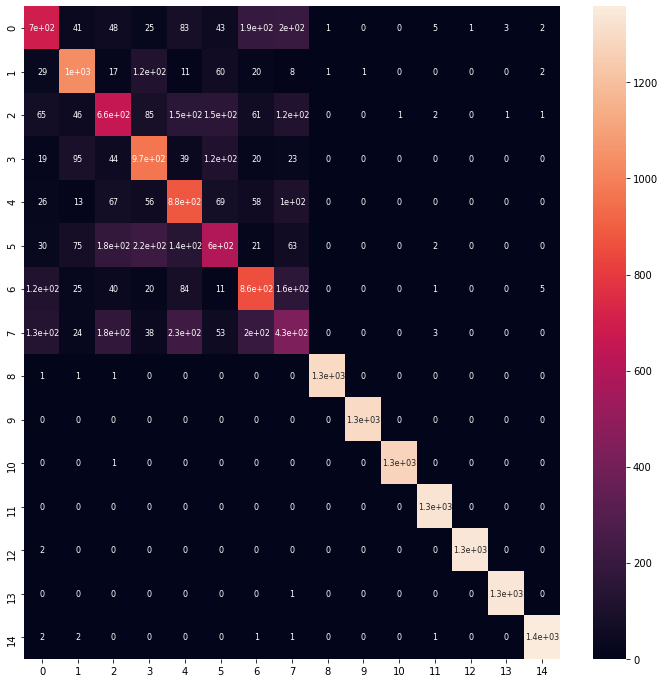

In [140]:
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
df_cm= pd.DataFrame(cm)
plt.figure(figsize=(12,12))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})

In [107]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
)
y_pred = clf.predict(X_test) # predictions
score = balanced_accuracy_score(y_test, y_pred) # scoring
print('balanced_accuracy score: {}'.format(score))
score = accuracy_score(y_test, y_pred) # scoring
print('accuracy score: {}'.format(score))

y_pred = clf.predict(X_train) # predictions
score = balanced_accuracy_score(y_train, y_pred) # scoring
print('balanced_accuracy score: {}'.format(score))
score = accuracy_score(y_train, y_pred) # scoring
print('accuracy score: {}'.format(score))

balanced_accuracy score: 0.7763253796535923
accuracy score: 0.7764646464646464
balanced_accuracy score: 0.8096545833873084
accuracy score: 0.8096019900497512


In [104]:
N, train_score, val_score = learning_curve(model,X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv = 3)

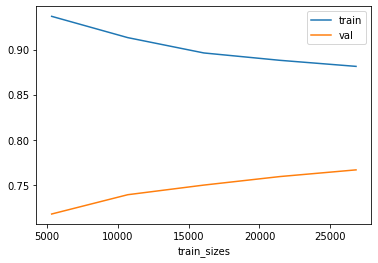

In [105]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='val')
plt.xlabel('train_sizes')
plt.legend()